C) Train a Gradient Boosting Regressor to predict Sales

C-2) Tune at least two hyperparameters using cross validation

In [8]:
import pandas as pd 

data_path = r'/Users/nathaliesaid/Desktop/MSCA 681/Carseats.csv'

carseats_df = pd.read_csv(data_path)

carseats_df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:

from sklearn.model_selection import train_test_split

#Split the data into temp and test sets
temp_df, train_df = train_test_split(carseats_df, test_size=0.6, random_state=42)

#Split the data into train and validation sets
test_df, validation_df = train_test_split(temp_df, test_size=0.5, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import random

X_train = train_df.drop("Sales", axis=1)
y_train = train_df["Sales"]

X_validation = validation_df.drop("Sales", axis=1)
y_validation = validation_df["Sales"]

X_test = test_df.drop("Sales", axis=1)
y_test = test_df["Sales"]

gbr = GradientBoostingRegressor(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200, 300],       
    'max_depth': np.arange(2, 6, 1),       
    'learning_rate': [0.01, 0.1, 0.2]      
}

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

random.seed(42)
grid_search.fit(X_train, y_train)

best_gbr = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': np.int64(2), 'n_estimators': 200}


C-3) Evaluate the model on the validation and test sets using MAE and RMSE

In [15]:
# Predictions
y_pred_val = best_gbr.predict(X_validation)
y_pred_test = best_gbr.predict(X_test)

# MAE
mae_val = mean_absolute_error(y_validation, y_pred_val)
mae_test = mean_absolute_error(y_test, y_pred_test)

#RMSE
rmse_val = np.sqrt(mean_squared_error(y_validation, y_pred_val))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Display the results
print("Evaluate the model on the validation and test sets:")
print(f"Validation MAE:  {mae_val:.3f}")
print(f"Validation RMSE: {rmse_val:.3f}")
print(f"Test MAE:        {mae_test:.3f}")
print(f"Test RMSE:       {rmse_test:.3f}")

Evaluate the model on the validation and test sets:
Validation MAE:  1.121
Validation RMSE: 1.390
Test MAE:        1.194
Test RMSE:       1.462


C-4) Determine which variables are the most important

Top 3 Most Important Predictors:
          Feature  Importance
5           Price    0.298007
8  ShelveLoc_Good    0.281415
1       CompPrice    0.124005


/var/folders/lv/m7nbq2492g5b9kzr0l3p2k8h0000gn/T/ipykernel_52549/3266975839.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


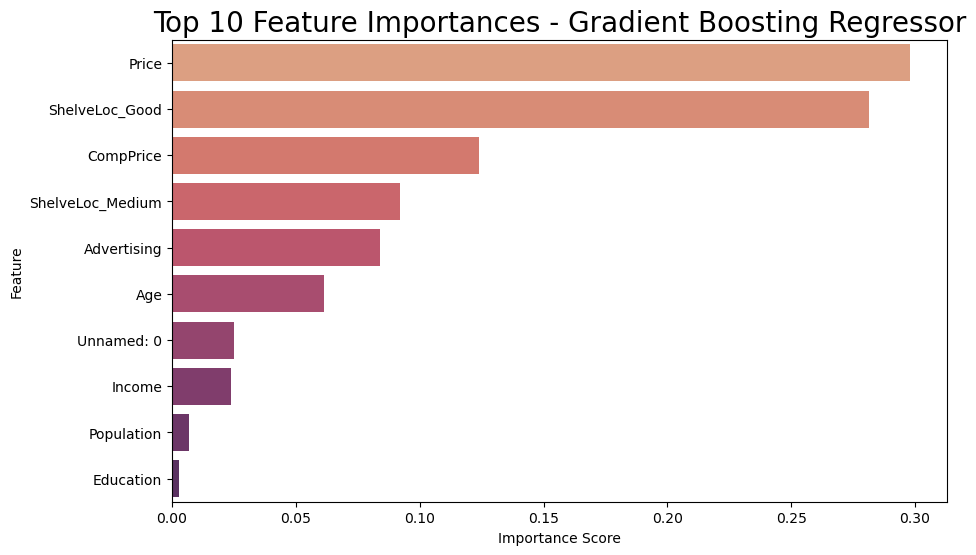

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_gbr.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Top features
print("Top 3 Most Important Predictors:")
print(feature_importance_df.head(3))

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df.head(10), 
    palette='flare'
)
plt.title('Top 10 Feature Importances - Gradient Boosting Regressor', fontsize=20)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()